This is beginer level first exercise or task.

#### condition: 
1) complete the task yourself. without looking at ready-made solutions
2) Try to comply with PEP8

#### GOAL:  
* Classify iris plants into three species in this classic dataset

exercise source <a href> https://www.kaggle.com/datasets/uciml/iris/data </a>


About dataset (in source)
____________________________

The Iris dataset was used in R.A. Fisher's classic 1936 paper, <a href="http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf">The Use of Multiple Measurements in Taxonomic Problems</a>, and can also be found on the <a href="http://archive.ics.uci.edu/ml/">UCI Machine Learning Repository</a>.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species




For work we need to load some python modules, frist of it is pandas.

We will upload other modules here as needed

In [48]:
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


Now let's download the dataset and see with our own eyes

In [28]:
df = pd.read_csv("data/Iris.csv")

# print dataset 
display(df)

# show some ditails 
display(df.describe())
df.info()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Our dataset have 4 numeric fields and one char.<br>
Numeric fields have next features: Sepal Length, Sepal Width, Petal Length and Petal Width.<br>
Field Species is target feature, that need to predict <br>

We see no null values that seys, dataset  prepared for work.
And data comes in a row. shuffle is nessusary before build model

Now load modules sklearn to explore dataset and any visualization tool (like plotly or matplotlib)<br>

<i> Do not fourget insert it on upper cell</i>



---------

Despite the simplicity of the dataset, let's look at the correlation of features

I has writed a function, for that. It may be useful in the future (next datasets)<br>
But befor we will use it. Transform target feature to binary or numeric type. 


In [29]:
def show_correlation(dataframe):
    '''
    Function drows dataset correlation matrix
    '''
    df_graph = round(dataframe.corr(),2)
    fig = px.imshow(df_graph, text_auto=True)
    fig.show()
    
# look Species counts 
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

We have only three classes, for simplicity let's call them 1,2,3.
And write our simple class_rename function

In [30]:
def class_rename(text):
    if text == "Iris-setosa":
        return 1
    elif text == "Iris-versicolor":
        return 2
    elif text == "Iris-virginica":
        return 3
    else:
        raise("unexpected value, check dataset")

Create new feature "Iris_class" and drop old feature "Species". In time we cat rename "Iris_class" to "Species" if it will be needed.
And drop Id it is not feature of Iris.

In [32]:
df["Iris_class"] = df["Species"].apply(class_rename)
df = df.drop(["Id","Species"], axis=1)
df["Iris_class"]

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Iris_class, Length: 150, dtype: int64

Now correlation ))

In [34]:
show_correlation(df)

OMG! I didn't expect such a strong correlation.<br>
Apparently this is due to the fact that this is still one Type of “Irises”<br>

We see that Sepal Width has minimal correlation with other features.<br>
While the Petal parameters depend on each other almost directly. And they greatly affect Sepal Length.<br>
From what we have seen, it already seems that it is easier to make predictions based on just 2 characteristics: Sepal Length Sepal Width.<br>

Let's try to see the difference in the visual distribution of values 
First  Sepal
Second Petal


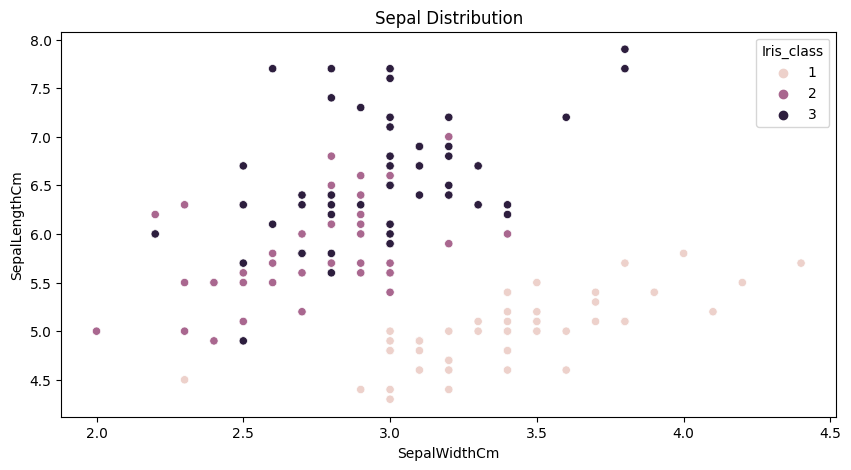

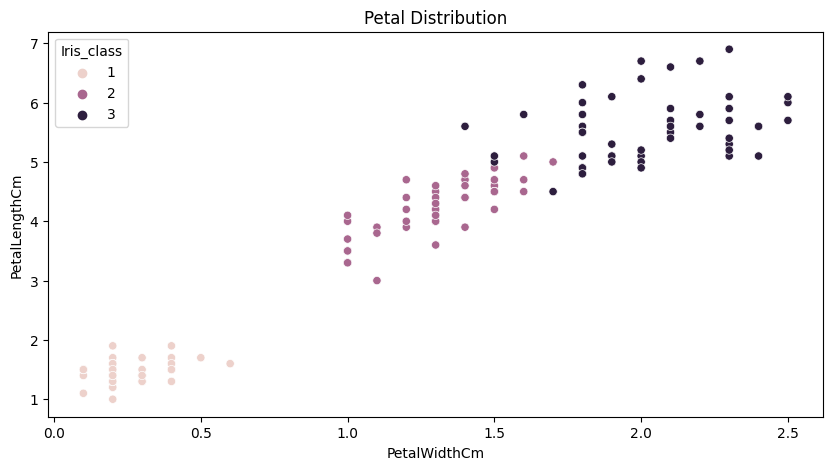

In [42]:
fig, ax = plt.subplots(figsize = (10, 5)) 
#Строим диаграмму рассеяния
sns.scatterplot(
    data=df, #датасет
    x='SepalWidthCm', #ось абсцисс
    y='SepalLengthCm', #ось ординат
    hue='Iris_class', #группировка
    #palette='seismic', #палитра
    ax=ax, #координатная плоскость
);
#Задаём название графика
ax.set_title('Sepal Distribution');

fig, ax = plt.subplots(figsize = (10, 5)) 
#Строим диаграмму рассеяния
sns.scatterplot(
    data=df, #датасет
    x='PetalWidthCm', #ось абсцисс
    y='PetalLengthCm', #ось ординат
    hue='Iris_class', #группировка
    #palette='seismic', #палитра
    ax=ax, #координатная плоскость
);
#Задаём название графика
ax.set_title('Petal Distribution');

In first graphic we see that Iris-versicolor and Iris-setosa inside one cluster (blue and beard dots)
But Iris-virginica  beige dots another cluster 

In second graphic all three Species have onw cluster


Now it is clear to us that Irises are still different.
And they can generally be classified based on the data using the model
let's do that<br>

_Our data is without gaps and more or less prepared. (we do not plan to expand them)
so you can move on to creating the model_

Let's divide our data into training and test (without additional validation)

__And import from sklearn train_test_split RidgeClassifier and from metrics classification_report__


In [79]:
X = df.drop('Iris_class', axis=1) #our data 
y = df['Iris_class'] # Write answer
# We need to shuffl data, because the data comes in a row and the model cannot learn correctly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17, shuffle=True)
print(("Train shape: {}".format(X_train.shape)))
print(("Test shape: {}".format(X_test.shape)))

Train shape: (120, 4)
Test shape: (30, 4)


I want to use Linar model like beginer and look what we have.<br>
In future we will use SVC or else.

In [80]:
iris_clf = RidgeClassifier().fit(X_train, y_train)
train_predict = iris_clf.predict(X_train)
test_predict = iris_clf.predict(X_test)
target_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
print("Train classification_report:", classification_report(y_train, train_predict,target_names=target_names))
print("Test classification_report:", classification_report(y_test, test_predict,target_names=target_names))

# print("Train f1:", metrics.f1_score(y_train, train_predict,average=None))
# print("Test f1:", metrics.f1_score(y_test, test_predict,average=None))



Train classification_report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        43
Iris-versicolor       0.88      0.59      0.71        39
 Iris-virginica       0.69      0.92      0.79        38

       accuracy                           0.84       120
      macro avg       0.86      0.84      0.83       120
   weighted avg       0.86      0.84      0.84       120

Test classification_report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.88      0.64      0.74        11
 Iris-virginica       0.73      0.92      0.81        12

       accuracy                           0.83        30
      macro avg       0.87      0.85      0.85        30
   weighted avg       0.85      0.83      0.83        30



OK report says 
f1 score intertritation
<table>
<tr><td>> f1 </td><td>Meaning</td></tr>
<tr><td>> 1 - 0.99 </td><td>may be retrained</td></tr>
<tr><td>> 0,99 - 0,9 </td><td>Very good</td></tr>
<tr><td>> 0,9 - 0,75 </td><td>Good</td></tr>
<tr><td>> 0.75 - 0,5 </td><td>Normal/OK</td></tr>
<tr><td>> 0.75 - 0,5 </td><td>Normal/OK</td></tr>
<tr><td>> < 0,5 </td><td>Not good/Bad</td></tr>
</table>

Retrained for Iris-setosa. <br>
and not bad for Iris-versicolor<br>
and good for Iris-virginica <br>


You can play with the sensitivity of the model for a more correct result.
Use SVC but for the first task, I’m happy with the result. And we will not complicate this with a selection of hyperparameters.

I hope my little workshop was useful to you!